# **Convolutional Neural Networks**

1. Tensors
2. DNN (Densely Connected Neural Network) vs CNN
3. Convolutions and Filters
4. Padding
5. Pooling Layers
6. Review Dropout

In [1]:
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()

11493376/11490434 [==============================] - 28s 2us/step


In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
single_image=X_train[0]

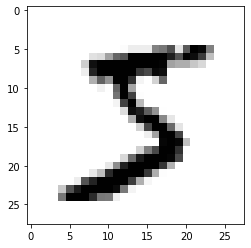

In [7]:
plt.imshow(single_image, cmap="gray_r")

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_train.shape

(60000,)

In [10]:
from keras.utils.np_utils import to_categorical

In [15]:
y_cat_train=to_categorical(y_train, 10)
y_cat_test=to_categorical(y_test, 10)
#this is one hot encoding

In [16]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
y_cat_train[0] #this is the number 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [21]:
single_image.max()
#this still hasnt been normalized.
#in order to normalize, we can divide each category by the max value in the set

255

In [22]:
X_train=X_train/X_train.max()
X_test=X_test/X_test.max()

In [23]:
scaled_image=X_train[0]

In [24]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [25]:
scaled_image.max()

1.0

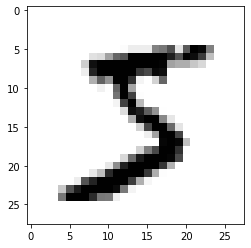

In [26]:
plt.imshow(scaled_image, cmap="gray_r")

In [27]:
X_train=X_train.reshape(60000, 28, 28, 1)

In [28]:
X_train.shape

(60000, 28, 28, 1)

In [29]:
X_test=X_test.reshape(10000, 28, 28, 1)

In [30]:
X_test.shape

(10000, 28, 28, 1)

In [31]:
from keras.models import Sequential

In [32]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [36]:
model=Sequential()

#Add Convolutional Layer

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation="relu"))

#Add Pooling Layer

model.add(MaxPool2D(pool_size=(2,2)))

#Transform the convolutional and pooling layers into something that the dense layer can understand. 
#to achieve that, we can flatten it out
#2D --> 1D

model.add(Flatten())

#Dense Layer
model.add(Dense(128, activation="relu"))
#128 is the number of neurons

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", 
             optimizer="rmsprop", metrics=["accuracy"])

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_train, y_cat_train, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 37s 612us/step - loss: 0.1472 - accuracy: 0.9551
Epoch 2/2
60000/60000 [==============================] - 36s 605us/step - loss: 0.0497 - accuracy: 0.9855


In [42]:
model.metrics_names

['loss', 'accuracy']

In [44]:
model.evaluate(X_test, y_cat_test)

10000/10000 [==============================] - 2s 183us/step


[0.04188677954261657, 0.986299991607666]

In [45]:
from sklearn.metrics import classification_report

In [46]:
predictions=model.predict_classes(X_test)

In [52]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [55]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [53]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [54]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

